In [12]:
#Step 1: Run OLS

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Load data (replace with actual file path if needed)
df = pd.read_csv("M2. module_2_data.csv")
df.head()

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016


In [3]:
# Drop date and year columns
X = df.drop(columns=['Date', 'US_STK', 'YEAR'])
y = df['US_STK']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit OLS
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 US_STK   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 25 May 2025   Prob (F-statistic):           2.41e-73
Time:                        14:38:34   Log-Likelihood:                 1029.1
No. Observations:                 250   AIC:                            -2042.
Df Residuals:                     242   BIC:                            -2014.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.865      0.3

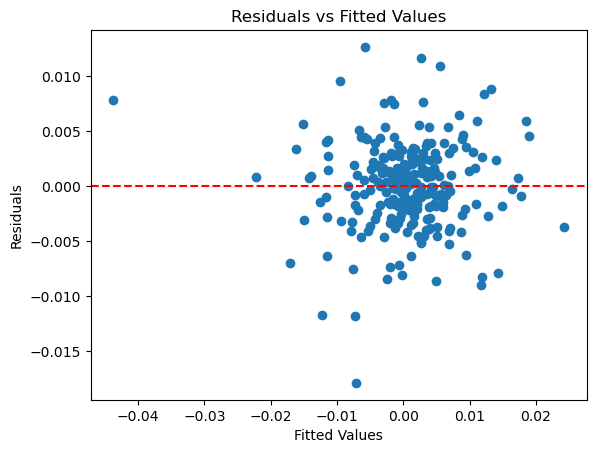

In [5]:
#Step 2: Residuals vs Fitted Plot

residuals = ols_model.resid
fitted_vals = ols_model.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [6]:
#Step 3: Breusch-Pagan Test

bp_test = het_breuschpagan(residuals, X_const)
bp_pvalue = bp_test[1]

print(f"Breusch-Pagan p-value: {bp_pvalue}")
# If p < 0.05 → heteroskedasticity likely exists

Breusch-Pagan p-value: 0.15031532354200963


In [8]:
#Step 4: Estimate Weights

abs_resid = np.abs(residuals)

# Regress absolute residuals on fitted values
ols_std_model = sm.OLS(abs_resid, sm.add_constant(fitted_vals)).fit()
fitted_std = ols_std_model.fittedvalues

# Variance = (fitted std)^2
weights = 1 / (fitted_std ** 2)
weights

0       95331.539840
1      118185.003197
2       96495.747932
3       89721.766835
4      104010.046001
           ...      
245    114885.052268
246    115160.097642
247    113703.313239
248    116896.467782
249    114991.820469
Length: 250, dtype: float64

In [9]:
#Step 5: Run WLS
wls_model = sm.WLS(y, X_const, weights=weights).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                 US_STK   R-squared:                       0.767
Model:                            WLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 25 May 2025   Prob (F-statistic):           6.42e-73
Time:                        14:40:04   Log-Likelihood:                 1030.1
No. Observations:                 250   AIC:                            -2044.
Df Residuals:                     242   BIC:                            -2016.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.860      0.3

3. Foreign Exchange Market Analysis Using Weighted Least Square Regression

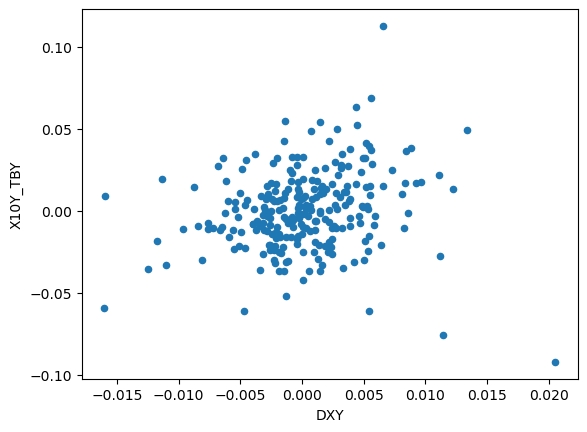

In [10]:
#Figure : U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return Scatter Plot

# Create scatter plot
scatt = df.plot.scatter(x="DXY", y="X10Y_TBY")
scatt.set(xlabel="DXY", ylabel="X10Y_TBY")
plt.show()

In [13]:
#Figure : OLS Regression Result

# OLS model
model_1 = smf.ols("DXY ~ X10Y_TBY", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DXY   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.738
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00582
Time:                        14:53:09   Log-Likelihood:                 986.78
No. Observations:                 250   AIC:                            -1970.
Df Residuals:                     248   BIC:                            -1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      0.474      0.636      -0.000       0.001
X10Y_TBY       0.0336      0.012      2.782      0.006       0.010       0.057
==============================================================================
Omnibus:                       26.741   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.918
Skew:                           0.322   Prob(JB):                     2.45e-21
Kurtosis:                       5.949   Cond. No.                         40.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Parameters with high precision
print(model_1.summary2().tables[1])

              Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
Intercept  0.000141  0.000297  0.474101  0.635845 -0.000444  0.000725
X10Y_TBY   0.033568  0.012067  2.781725  0.005823  0.009800  0.057336


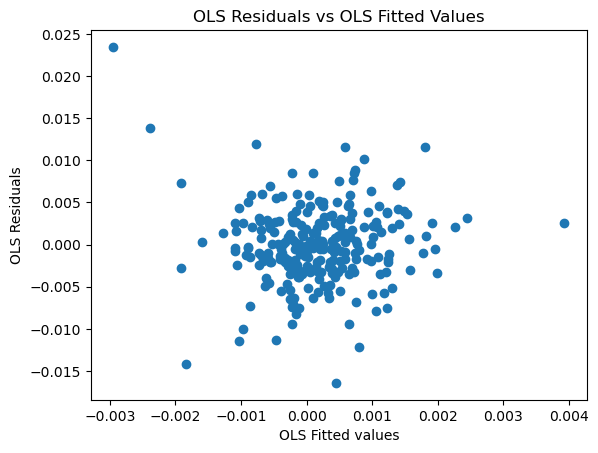

In [16]:
# Scatter Plot for OLS Fitted Values and OLS Residuals

# Fitted values and residuals
model_fitted_y = model_1.fittedvalues
model_resid_y = model_1.resid

# Plot
plt.scatter(x=model_fitted_y, y=model_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

In [17]:
#Figure : Breusch-Pagan Test Result

# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

,
Lagrange multiplier statistic,13.897238
p-value,0.000193
f-value,14.597521
f p-value,0.000168


In [18]:
# WLS regression result

# Add Absolute residuals and fitted values to dataset columns
df["abs_residuals"] = np.abs(model_1.resid)
df["fitted_values"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("abs_residuals ~ fitted_values", data=df).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights**-2
df["weights"] = weights

# Fit WLS model
Y = df["DXY"].tolist()
X = df["X10Y_TBY"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, df["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     27.59
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.23e-07
Time:                        14:58:13   Log-Likelihood:                 994.52
No. Observations:                 250   AIC:                            -1985.
Df Residuals:                     248   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.346      0.730      -0.000       0.001
x1             0.0516      0.010      5.253      0.000       0.032       0.071
==============================================================================
Omnibus:                       10.978   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.475
Skew:                           0.063   Prob(JB):                     7.99e-06
Kurtosis:                       4.496   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

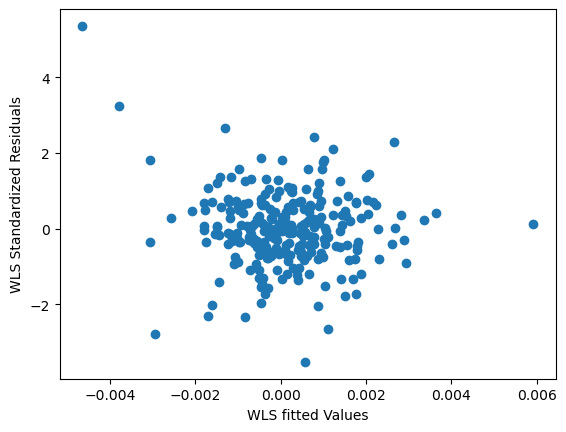

In [19]:
# WLS fitted values and standardized residuals
fitted_valuesWLS = model_WLS.fittedvalues
model_residWLS = model_WLS.resid
std_model_residWLS = model_residWLS / model_residWLS.std(ddof=1)

# Plot WLS fitted v. vs standardized res. scatterplot
plt.scatter(fitted_valuesWLS, std_model_residWLS)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()

In this lesson, we first reviewed the key assumptions for an ordinary least square regression model. We then relaxed the assumption of homoscedasticity. If the data shows heteroskedasticity, which is a violation of homoscedasticity, we will use a weighted least square regression model to handle the issue.

We pointed out that OLS is a special case for WLS when the weight is  1, which means the data is unweighted. We then introduced the basics of WLS and the steps to run WLS. We finished the lesson with one example from the foreign exchange market. In the next lesson, we will introduce another regression method when the assumptions of OLS do not hold up well in the dataset.